# Towards reproducible analysis of benthos structural complexity: A case study on Antarctic polychaete reefs using action cameras and remotely operated vehicles
- Aim: Relationships between substrate type and structural complexity
- Goal: Create a complete data pipeline for data analysis and visualization
- Authors: J.C. Montes-Herrera, G. Johnstone, J. Stark, N. Hill, V. Cummings, V. Lucieer
- Contact: juancarlos.montesherrera@utas.edu.au
- Associated publication submitted to journal Remote Sensing in Ecology & Conservation.

## Step 3 - CoralNet annotations file, dataframe and bar plot

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Read CoralNet annotations raw file
df = pd.read_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\annotations.csv")
print('Number of quadrats: ' + str(df["Name"].nunique())); print('Number of different labels: ' + str(df["Label"].nunique()))
print('Number of annotations: ', len(df))

df.head(3)

Number of quadrats: 51
Number of different labels: 31
Number of annotations:  7650


,Name,Row,Column,Label
0,04-ortho__1_00.jpg,188,124,SERP
1,04-ortho__1_00.jpg,129,210,SERP
2,04-ortho__1_00.jpg,189,107,SERP


In [3]:
## Create frequency table - observe new dataframe has 51 rows (quadrats) and 31 columns (labels)
# Cross tab: where unique names in the index/rows (Quadrats) and unique values in a column (Species label).
df_freq = pd.crosstab(index=df['Name'], columns=df['Label']) # DataFrame with Frequencies
print('Frequencies by Quadrat:')
df_freq.head(1)

Frequencies by Quadrat:


Label,ANEII,ASCXI,ASTIV,ASTVII,AXIX,BSR,Cri-I,HIII,MAENG,MERCC,...,SUSA,SVI,SVIII,SXIV,SXV,SXXIII,Sedturfrub,UNFO,WBS,WS
Name,,,,,,,,,,,,,,,,,,,,,
04-ortho__1_00.jpg,0,0,0,0,0,27,0,0,0,61,...,5,0,0,0,0,0,5,12,0,0


In [4]:
## Data cleaning
## Adjust row (quadrats) names
## This will make it easier to merge with the structural metrics (it also looks better)
df_freq.index = df_freq.index.str.replace(r'.jpg$', '', regex=True); df_freq.index = df_freq.index.str.replace(r'04-ortho__', 'A-', regex=True)
df_freq.index = df_freq.index.str.replace(r'05-ortho_', 'B-', regex=True); df_freq.index = df_freq.index.str.replace(r'06-ortho_', 'C-', regex=True)
df_freq.index = df_freq.index.str.replace(r'07-ortho_', 'D-', regex=True); df_freq.index = df_freq.index.str.replace(r'09-ortho_', 'E-', regex=True)
df_freq.index = df_freq.index.str.replace(r'10-ortho_', 'F-', regex=True); df_freq.index = df_freq.index.str.replace(r'11-ortho_', 'G-', regex=True)
df_freq.index = df_freq.index.str.replace(r'12-ortho_', 'H-', regex=True)
# df_freq.head(3)

In [5]:
## Separate biodiversity from substrate categories.
## This for biodiversity analysis and visualization.

df_biod = df_freq[['ANEII','ASCXI','AXIX','Cri-I','HIII','SABI','SLIV','SLXVI',
                       'SVI','SVIII','SXIV','SXV','SXXIII','WBS','WS','ASTIV',
                       'ASTVII','OIV','OEBS','REDUID','STER']]

df_biod.head(2)

Label,ANEII,ASCXI,AXIX,Cri-I,HIII,SABI,SLIV,SLXVI,SVI,SVIII,...,SXV,SXXIII,WBS,WS,ASTIV,ASTVII,OIV,OEBS,REDUID,STER
Name,,,,,,,,,,,,,,,,,,,,,
A-1_00,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,2
A-1_01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [6]:
# Could use one just selecting broad substrate
df_substrate = df_freq.drop(labels = df_biod.columns.tolist(), axis = 1)

df_substrate.head(2)

Label,BSR,MAENG,MERCC,MERNC,SCC,SCRO,SERP,SUSA,Sedturfrub,UNFO
Name,,,,,,,,,,
A-1_00,27,0,61,0,0,0,32,5,5,12
A-1_01,46,0,65,0,0,1,6,9,1,18


In [7]:
# Convert frequencies to percent cover and save DataFrame
df_benthic_cover = df_substrate.apply(lambda x: x*100/sum(x), axis=1)
df_benthic_cover.head()

Label,BSR,MAENG,MERCC,MERNC,SCC,SCRO,SERP,SUSA,Sedturfrub,UNFO
Name,,,,,,,,,,
A-1_00,19.014085,0.0,42.957746,0.0,0.0,0.000000,22.535211,3.521127,3.521127,8.450704
A-1_01,31.506849,0.0,44.520548,0.0,0.0,0.684932,4.109589,6.164384,0.684932,12.328767
A-1_10,78.000000,0.0,1.333333,0.0,0.0,0.000000,20.000000,0.000000,0.666667,0.000000
A-1_11,20.422535,0.0,30.281690,0.0,0.0,0.000000,15.492958,6.338028,0.000000,27.464789
A-2_00,8.843537,0.0,0.000000,0.0,0.0,0.000000,78.911565,0.000000,0.000000,12.244898


In [8]:
## Rename previous CoralNet labels 
## New dataframe just for plotting benthic cover, 
## in the next step we will add structural metrics to the original dataframe
substrate_clean = df_benthic_cover.rename({"BSR": "Broken Polychaete Tubes", "MERCC": "Crustose Coralline Algae", "MERNC":"Encrusting Red Non-Calc",
                "SCC": "Cobbles","SERP": "Polychaete Colonies", "SUSA": "Mud",'MAENG':'Green Encrusting Algae','SCRO':'Rock','UNFO':'Unfocused', 'Sedturfrub':'Turf algae'}, 
               axis='columns', errors="raise")

## Discard quadrats where analysis is not optimal due to survey altitude
## This has effects in benthic classification (increasing the number of Unfocused areas)
## As well as in structural metrics increasing the error (See table with scale error)
substrate_clean = substrate_clean.drop(['A-1_00','A-1_10','A-1_11','G-2_00', 'G-2_01'])

substrate_clean.head(3)

Label,Broken Polychaete Tubes,Green Encrusting Algae,Crustose Coralline Algae,Encrusting Red Non-Calc,Cobbles,Rock,Polychaete Colonies,Mud,Turf algae,Unfocused
Name,,,,,,,,,,
A-1_01,31.506849,0.0,44.520548,0.0,0.0,0.684932,4.109589,6.164384,0.684932,12.328767
A-2_00,8.843537,0.0,0.000000,0.0,0.0,0.000000,78.911565,0.000000,0.000000,12.244898
A-2_01,8.510638,0.0,0.000000,0.0,0.0,0.000000,82.978723,0.000000,0.000000,8.510638


### Export substrate DF

In [9]:
# substrate_clean.to_csv(r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\substrate_cover_clean.csv")

## Plots

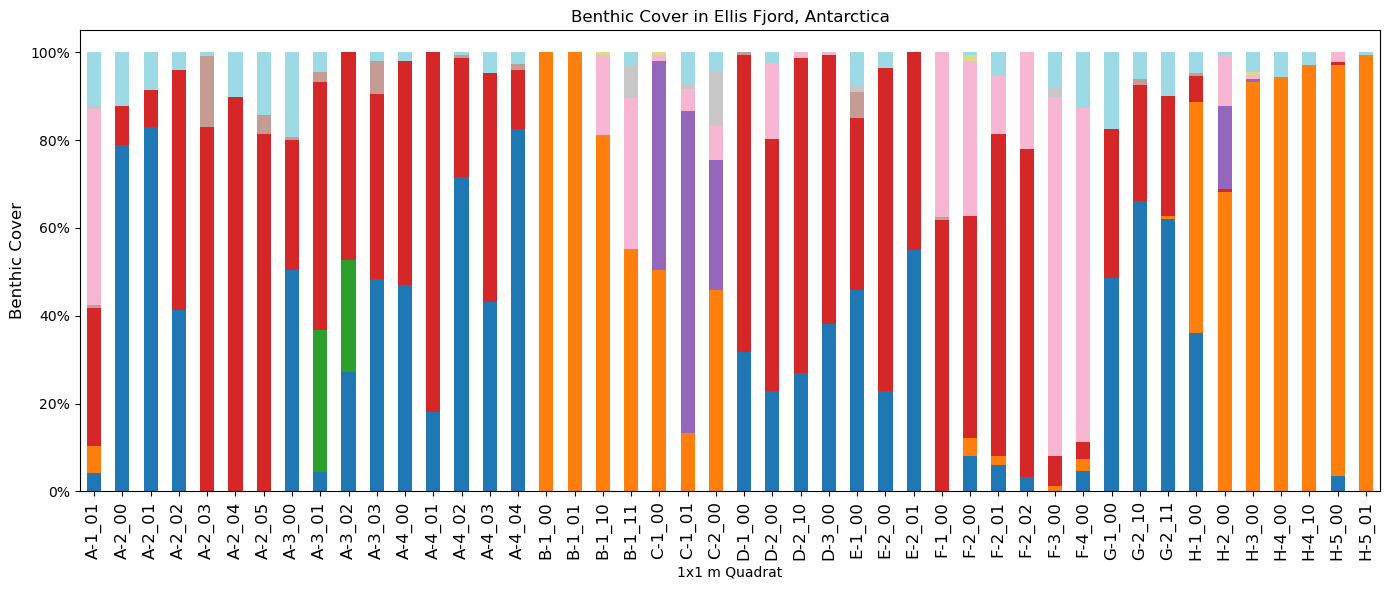

In [11]:
cols = ['Polychaete Colonies', 'Mud', 'Green Encrusting Algae','Broken Polychaete Tubes', 'Cobbles', 
       'Turf algae', 'Crustose Coralline Algae', 'Rock','Encrusting Red Non-Calc', 'Unfocused']

## Create plot
plt.rcParams["figure.figsize"] = (14, 6) ## Matplotlib figure size

ax = substrate_clean[cols].plot(kind="bar", stacked=True, title='Benthic Cover in Ellis Fjord, Antarctica', fontsize=10, cmap='tab20') ## Bar plot
ax.set_xlabel("1x1 m Quadrat", fontdict={'fontsize':10}); 
ax.set_ylabel("Benthic Cover", fontdict={'fontsize':12})
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(rotation=90, fontsize=12)
ax = plt.gca()
ax.legend().remove()

# plt.legend(loc="center", bbox_to_anchor=(1.12, 0.5), ncol =1)
plt.tight_layout()
## Save figure in Results directory
PATH_r = r"C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\figures/"
ax.figure.savefig(PATH_r + 'benthic-cover-plot.png', dpi=600)
plt.show()

In [13]:
df_biod_clean = df_biod.drop(['A-1_00','A-1_10','A-1_11','G-2_00', 'G-2_01']) # Drop bad quadrats, similar as above for substrate df.

In [14]:
## Calculate richness
richness = df_biod_clean.iloc[:,:].nunique(axis=1) # Series

## Add it to Substrate dataframe for correlation analysis in next step.
# substrate_clean['Richness'] = richness

# Calculate Shannon-Index
proportions = df_biod_clean.div(df_biod_clean.sum(axis=1), axis=0)
shannon_index = -np.sum(proportions * np.log(proportions), axis=1)
# substrate_clean['ShannonIndex'] = shannon_index

C:\Users\jcmontes\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [15]:
# richness.to_csv(r'C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\richness.csv')
# shannon_index.to_csv(r'C:\Users\jcmontes\Documents\GitHub\ant_biogenic_structures\data\shannon-index.csv')

## Biodiversity plot

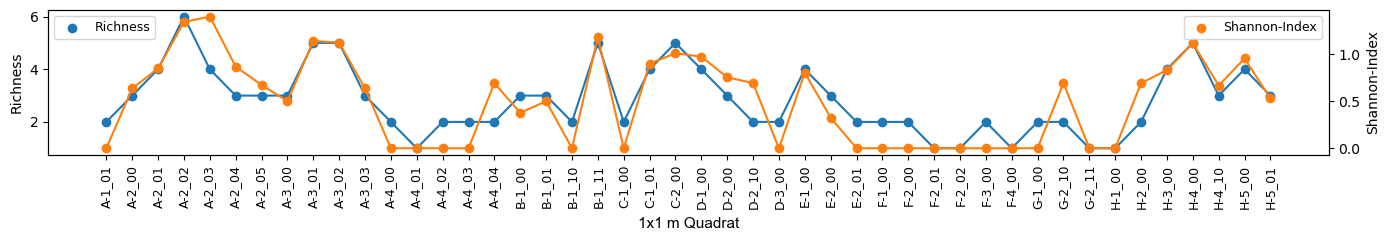

In [16]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14,2.5))

# Plot Richness on primary y-axis
ax1.plot(richness.index, richness, color='C0')
ax1.scatter(richness.index, richness, color='C0', label='Richness')
ax1.set_xlabel('1x1 m Quadrat', fontname='Arial', fontsize=11,labelpad=5)
ax1.set_ylabel('Richness', fontdict={'fontsize': 10})
ax1.tick_params(axis='y')

plt.xticks(rotation=90, fontsize=9)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot Shannon-Index on secondary y-axis
ax2.plot(shannon_index.index, shannon_index, color='C1')
ax2.scatter(shannon_index.index, shannon_index, color='C1', label='Shannon-Index')
ax2.set_ylabel('Shannon-Index', fontdict={'fontsize': 10})
ax2.tick_params(axis='y')

# Set legend
ax1.legend(loc='upper left', fontsize=9)
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
# plt.savefig(PATH_r + 'richness-shannon-plot.png', dpi=600)
plt.show()

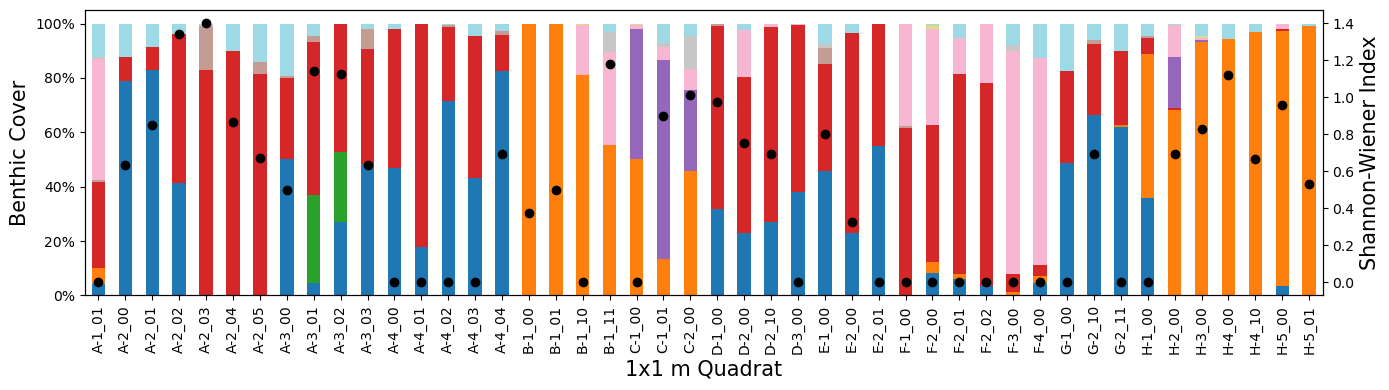

In [24]:
# Set figure size
plt.rcParams["figure.figsize"] = (14, 4)

# Create subplots
fig, ax1 = plt.subplots()

# Plot the left plot on ax1
substrate_clean[cols].plot(kind="bar", stacked=True, ax=ax1, cmap='tab20')
ax1.set_xlabel("1x1 m Quadrat", fontdict={'fontsize':15})
ax1.set_ylabel("Benthic Cover", fontdict={'fontsize':15})
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.tick_params(axis='y')

# Create a secondary y-axis on ax1
ax2 = ax1.twinx()

# Plot the right plot on ax2
# ax2.plot(shannon_index.index, shannon_index, color='black', linestyle='--')
ax2.scatter(shannon_index.index, shannon_index, color='black', label='S-W index')
# ax2.plot(shannon_index.index, shannon_index, color='yellow')
# ax2.scatter(shannon_index.index, shannon_index, color='yellow', label='Shannon-Index')
ax2.set_ylabel('Shannon-Wiener Index', fontdict={'fontsize': 15})
ax2.tick_params(axis='y')

# # Set legends
# ax1.legend(loc="lower center", bbox_to_anchor=(1.13, -0.15), ncol =1, fontsize=9)
# ax2.legend(loc='upper right', fontsize=9)

# ax1.legend(loc="lower center", ncol=1, bbox_to_anchor=(1.2, -0.20), fontsize=14)
# ax2.legend(loc='upper right', fontsize=9)

# Rotate x-tick labels
plt.xticks(rotation=90, fontsize=15)

# Set plot title
# plt.title('Main Benthic Cover and Shannon-Wiener Index in Ellis Fjord, Antarctica', fontsize=14)

ax1.legend().remove()

# Save the figure
plt.tight_layout()
plt.savefig(PATH_r + 'cover-shannon_label_3.png', dpi=600)

# Show the plot
plt.show()


In [24]:
## Add Transect column
transect = []

for i, quadrat in enumerate(df_biod.index):
    t = df_biod.index[i][0]
    transect.append(t);

df_biod.insert(loc=0, column = 'Transect', value = np.array(transect))

In [25]:
# Transect biodiversity
t_biod = df_biod.groupby(['Transect']).sum()
# t_biod_filter = t_biod.loc[(t_biod > 0).any(axis=1)]
# t_biod.head()

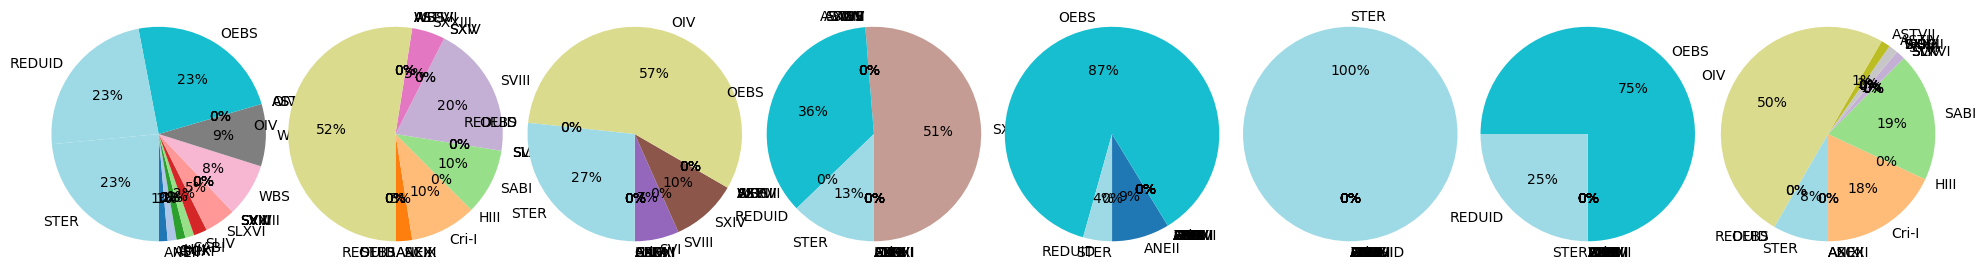

In [27]:
import matplotlib.patches as patches

colors = plt.cm.tab20(range(len(t_biod.columns)))

fig, axes = plt.subplots(1, len(t_biod.index), figsize=(23, 3), sharey=True)

# Define a custom color palette
for i, (index, row) in enumerate(t_biod.iterrows()):
    # axes[i].pie(row, startangle=-90, colors=colors)
    axes[i].pie(row, labels=row.index, autopct='%1.0f%%', startangle=-90, colors=colors) #labels
    # center_circle = patches.Circle((0,0),0.5,fc='white') # Add a white circle to create the hole
    # axes[i].add_artist(center_circle)
    axes[i].axis('equal')  # ensure the pie is drawn as a circle
    # axes[i].set_title(index)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4)

# plt.tight_layout()
plt.savefig(PATH_r + 'transect-pie-plot.png', dpi=600)
# show the plot
plt.show()

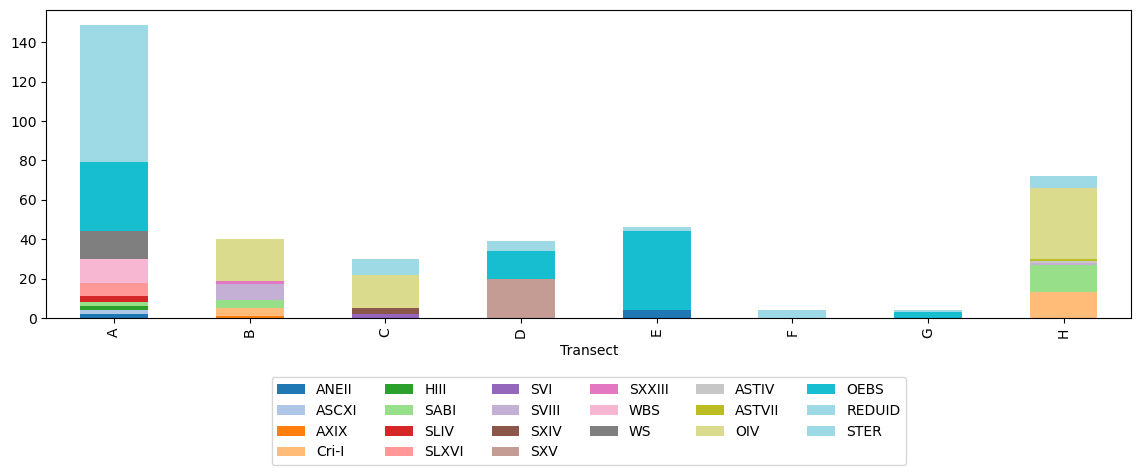

In [98]:
## Create plot
plt.rcParams["figure.figsize"] = (14, 4) ## Matplotlib figure size
t_biod.plot(kind="bar", stacked=True, title='', fontsize=10, cmap='tab20')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol =6)
# plt.savefig(PATH_r + 'only-labels.png', dpi=600)

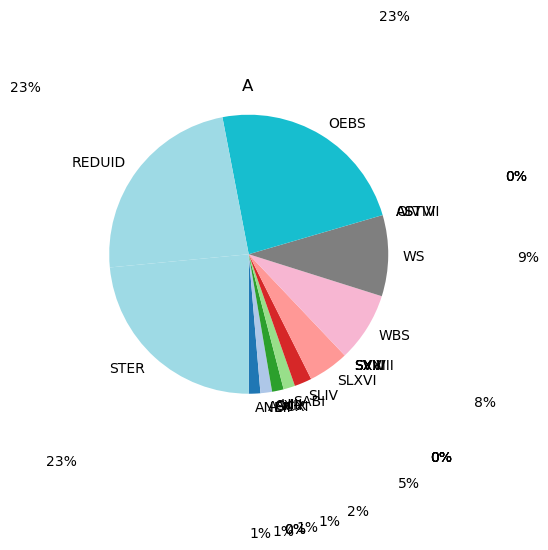

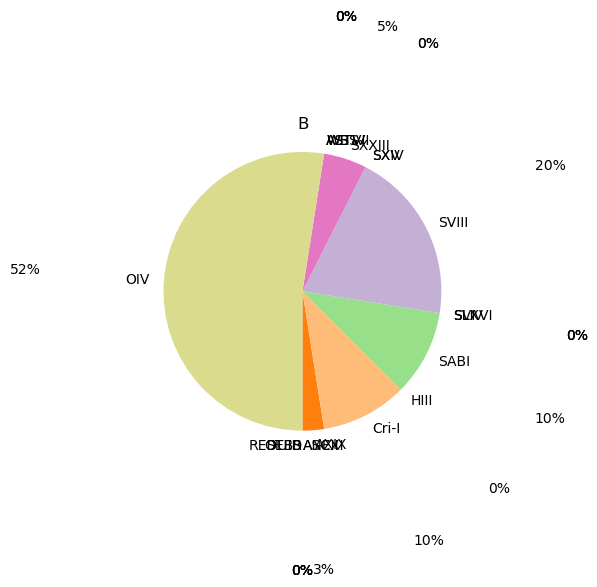

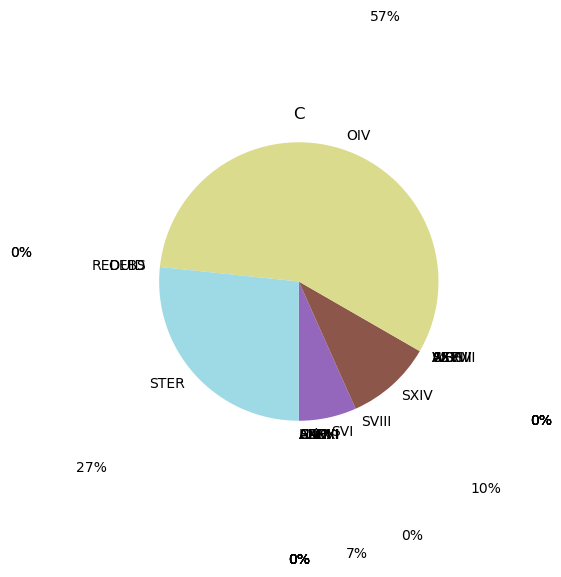

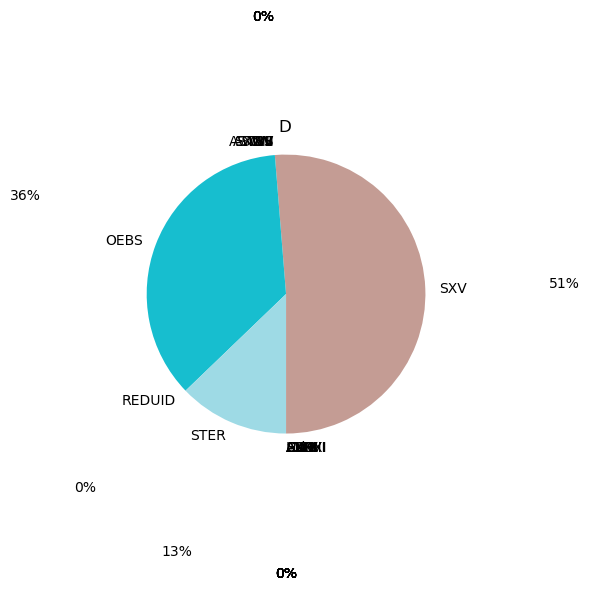

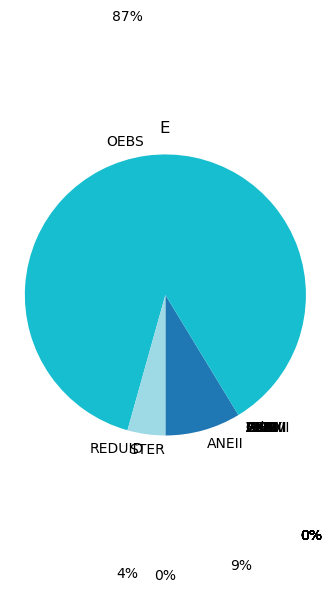

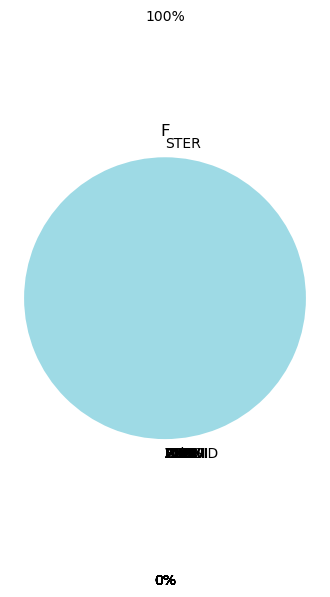

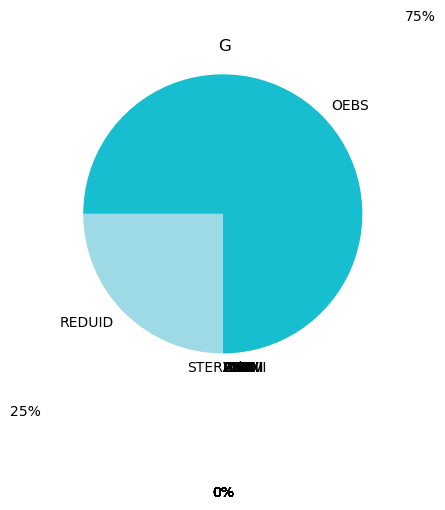

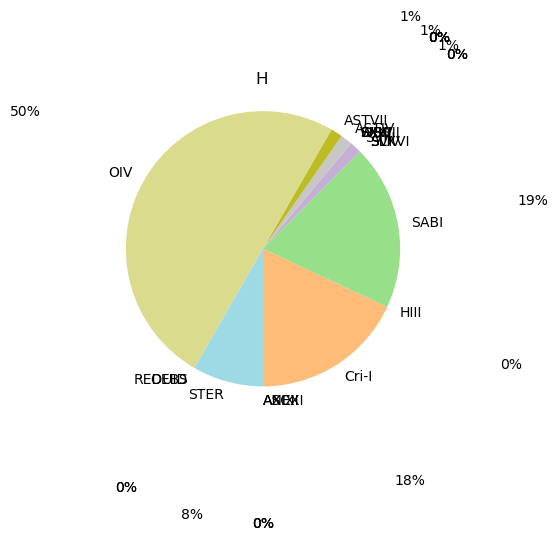

In [31]:
# loop through the rows and create a pie chart for each transect
colors = plt.cm.tab20(range(len(t_biod.columns)))

for index, row in t_biod.iterrows():
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(row, labels=row.index, autopct='%1.0f%%', startangle=-90, colors=colors, pctdistance=2)
    ax.axis('equal')  # ensure the pie is drawn as a circle
    ax.set_title(index)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    
    # plt.savefig(PATH_r + index + 'full-pie-plot.png')
    # show the plot
    plt.show()

Text(0.5, 1.0, 'Multidimensional Scaling Plot of Bray-Curtis Distances')

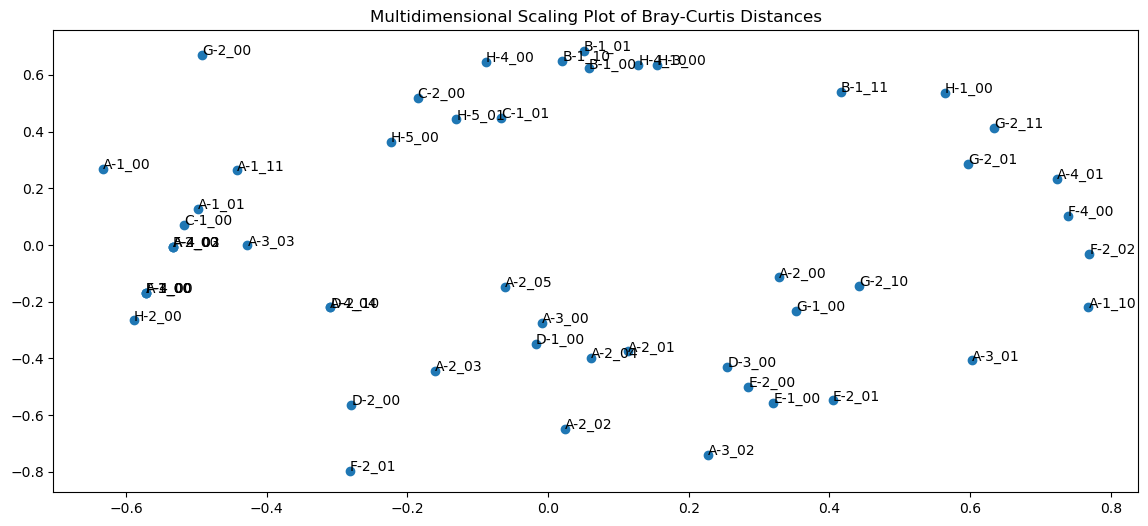

In [157]:
from scipy.spatial.distance import braycurtis
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# Visualization 1: Pairwise Bray-Curtis distance heatmap
bc_matrix = pd.DataFrame(squareform(pdist(df_biod, metric='braycurtis')), 
                         columns=df_biod.index, index=df_biod.index)
# sns.heatmap(bc_matrix, cmap='coolwarm', annot=True)
# plt.title('Pairwise Bray-Curtis Distances')

bc_matrix = bc_matrix.fillna(bc_matrix.mean())


# Visualization 2: Multidimensional scaling (MDS) plot
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=123)
bc_mds = mds.fit_transform(bc_matrix)
fig, ax = plt.subplots()
ax.scatter(bc_mds[:, 0], bc_mds[:, 1])
for i, txt in enumerate(bc_matrix.index):
    ax.annotate(txt, (bc_mds[i, 0], bc_mds[i, 1]))
plt.title('Multidimensional Scaling Plot of Bray-Curtis Distances')